In [1]:
import pandas as pd

In [2]:
business_df = pd.read_csv("business_filtered_data.csv", low_memory=False)

In [3]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   business_id                            13989 non-null  object 
 1   name                                   13989 non-null  object 
 2   city                                   13989 non-null  object 
 3   state                                  13989 non-null  object 
 4   postal_code                            13988 non-null  float64
 5   stars                                  13989 non-null  float64
 6   review_count                           13989 non-null  int64  
 7   attributes.HasTV                       11076 non-null  object 
 8   attributes.OutdoorSeating              11276 non-null  object 
 9   attributes.RestaurantsTableService     5948 non-null   object 
 10  attributes.Ambience                    10944 non-null  object 
 11  at

In [4]:
retain_columns = ['attributes.RestaurantsTakeOut', 'attributes.RestaurantsDelivery', 'attributes.BusinessAcceptsCreditCards',
                  'attributes.Ambience', 'attributes.Alcohol', 'attributes.RestaurantsReservations',
                  'attributes.Caters', 'attributes.GoodForKids', 'attributes.RestaurantsGoodForGroups',
                  'attributes.NoiseLevel', 'attributes.OutdoorSeating', 'attributes.BikeParking',
                  'attributes.RestaurantsPriceRange2', 'attributes.WiFi', 'attributes.WheelchairAccessible',
                  'hours.Monday', 'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday', 
                  'hours.Saturday', 'hours.Sunday', 'attributes.BusinessParking', 'attributes.HasTV',
                  'business_id', 'name', 'city', 'state', 'postal_code', 'stars', 'review_count']

In [5]:
drop_columns = ['attributes.RestaurantsAttire', 'attributes.CoatCheck', 'attributes.ByAppointmentOnly', 
                'attributes.DogsAllowed', 'attributes.GoodForMeal', 'attributes.DriveThru', 'attributes.HappyHour',
                'attributes.BusinessAcceptsBitcoin', 'attributes.RestaurantsTableService', 'attributes.Music', 
                'attributes.BestNights', 'attributes.Smoking', 'attributes.GoodForDancing', 'attributes.Corkage', 
                'attributes.BYOB', 'attributes.AgesAllowed', 'attributes.BYOBCorkage', 'attributes.DietaryRestrictions',
                'attributes.AcceptsInsurance', 'attributes.Open24Hours', 'attributes.RestaurantsCounterService', 
                'attributes.HairSpecializesIn', 'hours', 'attributes', 'categories']

# Dropping useless columns

In [6]:
business_df = business_df.drop(drop_columns, axis=1)

## Correcting column names

In [7]:
column_names_renamed = []
for val in business_df.columns:
    temp = val.split('.')
    column_names_renamed.append(temp[-1])

In [8]:
business_df.columns = column_names_renamed
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 13989 non-null  object 
 1   name                        13989 non-null  object 
 2   city                        13989 non-null  object 
 3   state                       13989 non-null  object 
 4   postal_code                 13988 non-null  float64
 5   stars                       13989 non-null  float64
 6   review_count                13989 non-null  int64  
 7   HasTV                       11076 non-null  object 
 8   OutdoorSeating              11276 non-null  object 
 9   Ambience                    10944 non-null  object 
 10  RestaurantsTakeOut          13175 non-null  object 
 11  RestaurantsDelivery         13015 non-null  object 
 12  RestaurantsGoodForGroups    10343 non-null  object 
 13  BusinessParking             120

## Filter Restaurants by Review count

In [9]:
useful_cols = ['name', 'city', 'state', 'postal_code', 'stars', 'review_count']

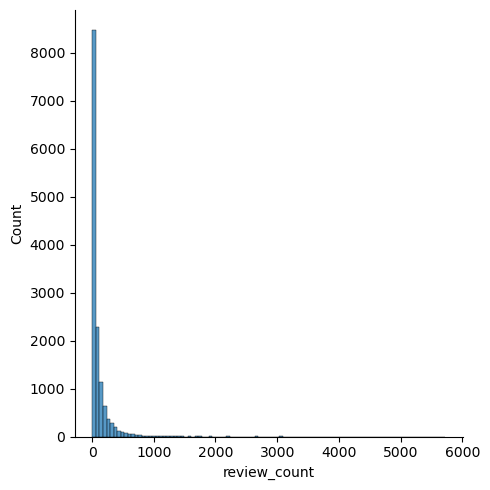

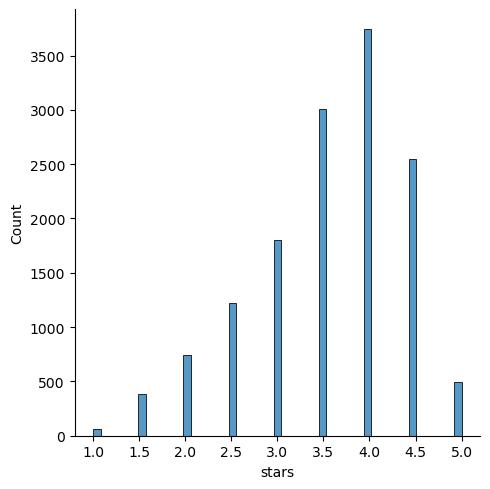

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.displot(business_df['review_count'], bins=100)
sns.displot(business_df['stars'])
plt.show()

Restaurants with less than 100 reviews

In [11]:
# Shape of the original data
business_df.shape

(13989, 31)

# TRY TO INVESTIGATE WHY RESTAURANTS HAVE REVIEWS LESS THAN 100.
- Look at How many days the restaurants were operational
- How many reviews per day did they get.
- What were the average stars per day
- What is the distribution of stars in this subsample


In [12]:
# Number of restaurants with less than 100 reviews.
# These can be safely ignored. FOR NOW .
business_df[business_df['review_count'] < 100].shape

(10135, 31)

In [13]:
# Filtering out restaurants with less than 100 reviews
business_df = business_df.loc[business_df['review_count'] > 100]

In [14]:
# Shape of data after filtering out low reviewed restaurants
business_df.shape

(3820, 31)

Restaurants with more than 100 reviews

In [15]:
business_df.groupby('stars').aggregate('sum')['review_count']

C:\Users\blahb\AppData\Local\Temp\ipykernel_26548\4103427134.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  business_df.groupby('stars').aggregate('sum')['review_count']


stars
1.5       314
2.0      5017
2.5     25929
3.0     72646
3.5    235788
4.0    481788
4.5    259584
5.0      7696
Name: review_count, dtype: int64

1. Sample equal number (13) restaurants from each star rating segment

In [16]:
# Lowest rated restaurants
lowest_rated_restaurants = business_df.loc[business_df['stars'] == 1.5]

# Sample restaurants from each star rating
star_ratings = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
sampled_dfs = {}
filtered_df = business_df.loc[(business_df['stars'] > 1.5) & (business_df['stars'] <= 5.0)]

for star in star_ratings:
    sampled_df = filtered_df.loc[filtered_df['stars'] == star].sample(14, random_state=10)
    sampled_dfs[f'star_{star}_df'] = sampled_df

combined_df = pd.concat(sampled_dfs.values())
business_df = pd.concat([combined_df, lowest_rated_restaurants])
business_df = business_df.reset_index(drop=True)

In [17]:
business_df['review_count'].sum()

27460

# Extract the business ids and write to a csv file

In [18]:
business_df['business_id'].to_csv('businesses_to_focus_on.csv', index=False)

MONGODB
1. Extract reviews of these business
2. business_ids array on the left - review table on the right
3. checkin table filtered for important businesses
4. tips table filtered for important businesses.

# Filling NA values
1. Clean all the columns in the filtered data, one column at a time.

In [19]:
business_df.isnull().sum().sort_values()

business_id                    0
name                           0
city                           0
state                          0
postal_code                    0
stars                          0
review_count                   0
RestaurantsTakeOut             0
RestaurantsPriceRange2         1
BusinessParking                1
RestaurantsDelivery            1
Friday                         1
BusinessAcceptsCreditCards     1
Saturday                       2
OutdoorSeating                 3
Thursday                       3
Wednesday                      4
Alcohol                        5
Caters                         5
WiFi                           5
RestaurantsReservations        5
Ambience                       6
HasTV                          6
BikeParking                    7
NoiseLevel                     8
RestaurantsGoodForGroups       9
Tuesday                        9
Monday                        10
GoodForKids                   11
Sunday                        18
Wheelchair

Filling all binary attributes with "False"

In [20]:
# Defining all binary attributes
binary_attributes = ['GoodForKids', 'RestaurantsGoodForGroups', 'BikeParking', 'RestaurantsReservations',
                    'HasTV', 'Caters', 'OutdoorSeating', 'WheelchairAccessible', 'RestaurantsDelivery',
                    'RestaurantsTakeOut', 'BusinessAcceptsCreditCards']

# Fill all missing values in binary columns with a False
business_df.loc[:, binary_attributes] = business_df[binary_attributes].fillna(False)

Alcohol

In [21]:
# Fill missing value with suitable
business_df['Alcohol'].fillna('\'none\'', inplace=True)

In [22]:
cols_to_drop = ['Alcohol']

# Function returns the plain string from the input
def return_plain_string(malformed):
    malformed = eval(malformed)
    return malformed

business_df['Alcohol2'] = business_df['Alcohol'].apply(lambda x: return_plain_string(x))


RestaurantsPriceRange2

In [23]:
# What is the name of the restaurant missing this value
business_df[business_df['RestaurantsPriceRange2'].isnull() == True][useful_cols]

# Yelp website shows that this restaurant's price is at 2.0 in a range of 1.0 to 4.0
business_df['RestaurantsPriceRange2'].fillna(2.0, inplace=True)

Monday

In [24]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

business_df.loc[:, days_of_week] = business_df[days_of_week].fillna('0:0-0:0')

BusinessParking

In [25]:
# No Parking dict map
noparking_string = "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"

# Filling the missing values with 'noparking'
business_df['BusinessParking'].fillna(noparking_string, inplace=True)

In [26]:
# Manually fixing one entry that could not be fixed by fillna
index = business_df[business_df['BusinessParking'] == 'None'].index[0]
business_df.at[index, 'BusinessParking'] = noparking_string

In [27]:
def parse_json_string(json_string, default='noparking'):
    json_string = eval(json_string)
    for k,v in json_string.items():
        if v == True:
            return k
    return default

# Fixing the values in the column
business_df['BusinessParking2'] = business_df['BusinessParking'].apply(lambda x: parse_json_string(x, default='noparking'))

# Will drop redundant columns later
cols_to_drop.append('BusinessParking')

NoiseLevel

In [28]:
business_df['NoiseLevel'].fillna('\'quiet\'', inplace=True)

In [29]:
# Fixing the values in the column
business_df['NoiseLevel2'] = business_df['NoiseLevel'].apply(lambda x: return_plain_string(x))
# Will drop redundant columns later
cols_to_drop.append('NoiseLevel')

Ambience                      

In [30]:
# Define a default state for this column
default_ambience_string = "{'romantic': None, 'intimate': None, 'classy': None, 'hipster': None, 'divey': None, 'touristy': None, 'trendy': None, 'upscale': None, 'casual': None}"
# Imputing missing values
business_df['Ambience'].fillna(default_ambience_string, inplace=True)

In [31]:
# Fixing the values in the column
business_df['Ambience2'] = business_df['Ambience'].apply(lambda x: parse_json_string(x, default='absent'))
# Will drop redundant columns later
cols_to_drop.append('Ambience')


WiFi

In [32]:
# Imputing missing values
business_df['WiFi'].fillna('\'no\'', inplace=True)

In [33]:
# Fixing the values in the column
business_df['WiFi2'] = business_df['WiFi'].apply(lambda x: return_plain_string(x))
# Will drop redundant columns later
cols_to_drop.append('WiFi')

Turn 'WiFi2' to 'FreeWifi', then change the values into True and False.

In [34]:
business_df['WiFi2'] = business_df['WiFi2'].replace('no', False)
business_df['WiFi2'] = business_df['WiFi2'].replace('free', True)

# new column renaming map
column_name_map = {
  'WiFi2': 'FreeWifi'
}

business_df.rename(columns=column_name_map, inplace=True)


Filter out columns that only have True / false values and change their type to bool.

In [35]:
for col in business_df.select_dtypes(include='object').columns.tolist():
  if col in ['OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsDelivery', \
    'BikeParking', 'RestaurantsReservations', 'Alcohol2', 'BusinessParking2', 'WiFi2', 
    'Ambience2']:
    print(f"{col} - {business_df[col].unique()}")

OutdoorSeating - ['False' 'True' False 'None']
RestaurantsTakeOut - ['True' 'False' 'None']
RestaurantsDelivery - ['True' 'False' 'None' False]
BikeParking - ['False' 'True' False 'None']
RestaurantsReservations - ['True' 'False' False 'None']
Alcohol2 - ['full_bar' 'none' 'beer_and_wine']
BusinessParking2 - ['lot' 'noparking' 'street' 'garage' 'valet']
Ambience2 - ['casual' 'touristy' 'trendy' 'divey' 'absent' 'classy' 'hipster'
 'upscale']


In [36]:
binary_cols = ['OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'BikeParking', 'RestaurantsReservations']
for col in binary_cols:
  business_df[col] = business_df[col].replace({'None': False, 'True': True, 'False': False})
  # business_df[col] = 

Dropping redundant columns

In [37]:
business_df.drop(cols_to_drop, axis=1, inplace=True)

Dividing columns into segments for ease of analysis

In [38]:
# days_of_week 
# binary_attributes
restaurant_attributes = ['HasTV', 'OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsDelivery',
'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'GoodForKids', 'BikeParking', 'Caters', 
'BusinessAcceptsCreditCards', 'WheelchairAccessible', 'RestaurantsReservations', 'Alcohol2',
'BusinessParking2', 'NoiseLevel2', 'Ambience2', 'WiFi2', 'business_id']

remaining_attributes = set(restaurant_attributes) - set(binary_attributes)

In [39]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 101 non-null    object 
 1   name                        101 non-null    object 
 2   city                        101 non-null    object 
 3   state                       101 non-null    object 
 4   postal_code                 101 non-null    float64
 5   stars                       101 non-null    float64
 6   review_count                101 non-null    int64  
 7   HasTV                       101 non-null    object 
 8   OutdoorSeating              101 non-null    bool   
 9   RestaurantsTakeOut          101 non-null    bool   
 10  RestaurantsDelivery         101 non-null    bool   
 11  RestaurantsGoodForGroups    101 non-null    object 
 12  Monday                      101 non-null    object 
 13  Tuesday                     101 non

Fixing the Restaurant timings
> Separate the opening and closing hours of each day of week into separate columns


In [40]:
business_df[['Monday_opening_hour', 'Monday_closing_hour']] = business_df['Monday'].str.split("-", expand=True)
business_df[['Tuesday_opening_hour', 'Tuesday_closing_hour']] = business_df['Tuesday'].str.split("-", expand=True)
business_df[['Wednesday_opening_hour', 'Wednesday_closing_hour']] = business_df['Wednesday'].str.split("-", expand=True)
business_df[['Thursday_opening_hour', 'Thursday_closing_hour']] = business_df['Thursday'].str.split("-", expand=True)
business_df[['Friday_opening_hour', 'Friday_closing_hour']] = business_df['Friday'].str.split("-", expand=True)
business_df[['Saturday_opening_hour', 'Saturday_closing_hour']] = business_df['Saturday'].str.split("-", expand=True)
business_df[['Sunday_opening_hour', 'Sunday_closing_hour']] = business_df['Sunday'].str.split("-", expand=True)

In [41]:
# Step 2: Convert to 24-hour time format
def convert_to_24_hour(time_str):
    hour, minute = map(int, time_str.split(':'))
    return f"{hour:02d}:{minute:02d}"

In [42]:
# All opening hours of the week
business_df['Monday_opening_hour'] = business_df['Monday_opening_hour'].str.split(':').str.get(0)
business_df['Monday_opening_hour'] = pd.to_numeric(business_df['Monday_opening_hour'])

business_df['Tuesday_opening_hour'] = business_df['Tuesday_opening_hour'].str.split(':').str.get(0)
business_df['Tuesday_opening_hour'] = pd.to_numeric(business_df['Tuesday_opening_hour'])

business_df['Wednesday_opening_hour'] = business_df['Wednesday_opening_hour'].str.split(':').str.get(0)
business_df['Wednesday_opening_hour'] = pd.to_numeric(business_df['Wednesday_opening_hour'])

business_df['Thursday_opening_hour'] = business_df['Thursday_opening_hour'].str.split(':').str.get(0)
business_df['Thursday_opening_hour'] = pd.to_numeric(business_df['Thursday_opening_hour'])

business_df['Friday_opening_hour'] = business_df['Friday_opening_hour'].str.split(':').str.get(0)
business_df['Friday_opening_hour'] = pd.to_numeric(business_df['Friday_opening_hour'])

business_df['Saturday_opening_hour'] = business_df['Saturday_opening_hour'].str.split(':').str.get(0)
business_df['Saturday_opening_hour'] = pd.to_numeric(business_df['Saturday_opening_hour'])

business_df['Sunday_opening_hour'] = business_df['Sunday_opening_hour'].str.split(':').str.get(0)
business_df['Sunday_opening_hour'] = pd.to_numeric(business_df['Sunday_opening_hour'])


In [43]:
# All closing hours in a week
business_df['Monday_closing_hour'] = business_df['Monday_closing_hour'].str.split(':').str.get(0)
business_df['Monday_closing_hour'] = pd.to_numeric(business_df['Monday_closing_hour'])

business_df['Tuesday_closing_hour'] = business_df['Tuesday_closing_hour'].str.split(':').str.get(0)
business_df['Tuesday_closing_hour'] = pd.to_numeric(business_df['Tuesday_closing_hour'])

business_df['Wednesday_closing_hour'] = business_df['Wednesday_closing_hour'].str.split(':').str.get(0)
business_df['Wednesday_closing_hour'] = pd.to_numeric(business_df['Wednesday_closing_hour'])

business_df['Thursday_closing_hour'] = business_df['Thursday_closing_hour'].str.split(':').str.get(0)
business_df['Thursday_closing_hour'] = pd.to_numeric(business_df['Thursday_closing_hour'])

business_df['Friday_closing_hour'] = business_df['Friday_closing_hour'].str.split(':').str.get(0)
business_df['Friday_closing_hour'] = pd.to_numeric(business_df['Friday_closing_hour'])

business_df['Saturday_closing_hour'] = business_df['Saturday_closing_hour'].str.split(':').str.get(0)
business_df['Saturday_closing_hour'] = pd.to_numeric(business_df['Saturday_closing_hour'])

business_df['Sunday_closing_hour'] = business_df['Sunday_closing_hour'].str.split(':').str.get(0)
business_df['Sunday_closing_hour'] = pd.to_numeric(business_df['Sunday_closing_hour'])




In [44]:
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in week_days:
  business_df.loc[business_df[f'{day}_closing_hour'] == 0, f'{day}_closing_hour'] = 24

In [45]:
business_df = business_df.drop(week_days, axis=1)

In [46]:
business_df.to_csv('imp_business_cleaned_data.csv', index=False)